In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/amazon_orders.csv')

<ipython-input-2-21bb03066754>:1: DtypeWarning: Columns (16,18,19,22,35,36,37,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/amazon_orders.csv')


Got csv file with pincodes from gov site

In [3]:
df_ext = pd.read_csv('/content/drive/MyDrive/Pincode_30052019.csv', encoding='latin-1')

In [4]:
df_ext.head()

,Circle Name,Region Name,Division Name,Office Name,Pincode,OfficeType,Delivery,District,StateName
0,Andhra Pradesh Circle,Kurnool Region,Anantapur Division,A Narayanapuram B.O,515004,BO,Delivery,ANANTHAPUR,Andhra Pradesh
1,Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Akuledu B.O,515731,BO,Delivery,ANANTHAPUR,Andhra Pradesh
2,Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Alamuru B.O,515002,BO,Delivery,ANANTHAPUR,Andhra Pradesh
3,Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Allapuram B.O,515766,BO,Delivery,ANANTHAPUR,Andhra Pradesh
4,Andhra Pradesh Circle,Kurnool Region,Anantapur Division,Aluru B.O,515415,BO,Delivery,ANANTHAPUR,Andhra Pradesh


# Cleaning Cities And States

In [5]:
df1  = df1.rename(columns={'ship_postal_code': 'Pincode'})

In [6]:
df1['Pincode'] = pd.to_numeric(df1['Pincode'], errors='coerce')
df1 = df1.dropna(subset=['Pincode'])
df1['Pincode'] = df1['Pincode'].astype(int)
df_ext['Pincode'] = df_ext['Pincode'].astype(int)
df = pd.merge(df1, df_ext[['Pincode', 'District', 'StateName']], on='Pincode', how='left')

<ipython-input-6-3825fb10e3c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pincode'] = df1['Pincode'].astype(int)


In [7]:
df.head()

,amazon_order_id,merchant_order_id,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,url,ship_service_level,...,account_id,create_time,update_time,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,District,StateName
0,171-0003648-9448303,NaN,16-12-2023 06:56,23-12-2023 09:46,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,3,18-01-2024 03:04,18-01-2024 03:04,NaN,NaN,NaN,NaN,NaN,NORTH GOA,Goa
1,171-0003648-9448303,NaN,16-12-2023 06:56,23-12-2023 09:46,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,3,18-01-2024 03:04,18-01-2024 03:04,NaN,NaN,NaN,NaN,NaN,NORTH GOA,Goa
2,171-0003648-9448303,NaN,16-12-2023 06:56,23-12-2023 09:46,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,3,18-01-2024 03:04,18-01-2024 03:04,NaN,NaN,NaN,NaN,NaN,NORTH GOA,Goa
3,171-0007507-1641150,NaN,07-11-2022 12:21,14-11-2022 08:23,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,4,18-01-2024 03:10,18-01-2024 03:10,NaN,NaN,NaN,NaN,NaN,Thoubal,Manipur
4,171-0007507-1641150,NaN,07-11-2022 12:21,14-11-2022 08:23,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,4,18-01-2024 03:10,18-01-2024 03:10,NaN,NaN,NaN,NaN,NaN,Thoubal,Manipur


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357169 entries, 0 to 357168
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amazon_order_id          357169 non-null  object 
 1   merchant_order_id        191395 non-null  object 
 2   purchase_date            357169 non-null  object 
 3   last_updated_date        357169 non-null  object 
 4   order_status             357169 non-null  object 
 5   fulfillment_channel      357169 non-null  object 
 6   sales_channel            357169 non-null  object 
 7   order_channel            165774 non-null  object 
 8   url                      0 non-null       float64
 9   ship_service_level       357169 non-null  object 
 10  product_name             357169 non-null  object 
 11  sku                      357169 non-null  object 
 12  asin                     357169 non-null  object 
 13  item_status              328344 non-null  object 
 14  quan

# Dropping Unnecessary Columns

In [9]:
df = df.drop(['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'url', 'currency', 'ship_country', 'promotion_ids', 'purchase_order_number', 'price_designation', 'original_order_id', 'ship_city', 'ship_state', 'sales_channel', 'order_channel'], axis=1)

# Handling Datatypes

In [10]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
df['create_time'] = pd.to_datetime(df['create_time'], errors='coerce')
df['update_time'] = pd.to_datetime(df['update_time'], errors='coerce')
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'], errors='coerce')

<ipython-input-10-d7d8fe0b2957>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
<ipython-input-10-d7d8fe0b2957>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['create_time'] = pd.to_datetime(df['create_time'], errors='coerce')
<ipython-input-10-d7d8fe0b2957>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['update_time'] = pd.to_datetime(df['update_time'], errors='coerce')
<ipython-input-10-d7d8fe0b2957>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a f

In [11]:
error_index = df[df['item_price'] == 'PILLOW_COVER-GREEN'].index
df = df.drop(error_index)

In [12]:
df['item_price'] = pd.to_numeric(df['item_price'])
df['item_tax'] = pd.to_numeric(df['item_tax'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357166 entries, 0 to 357168
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   amazon_order_id          357166 non-null  object        
 1   merchant_order_id        191395 non-null  object        
 2   purchase_date            357166 non-null  datetime64[ns]
 3   last_updated_date        357166 non-null  datetime64[ns]
 4   order_status             357166 non-null  object        
 5   fulfillment_channel      357166 non-null  object        
 6   ship_service_level       357166 non-null  object        
 7   product_name             357166 non-null  object        
 8   sku                      357166 non-null  object        
 9   asin                     357166 non-null  object        
 10  item_status              328341 non-null  object        
 11  quantity                 357166 non-null  object        
 12  item_price           

In [14]:
state_counts = df['StateName'].value_counts()
top_10_states = state_counts.head(10)

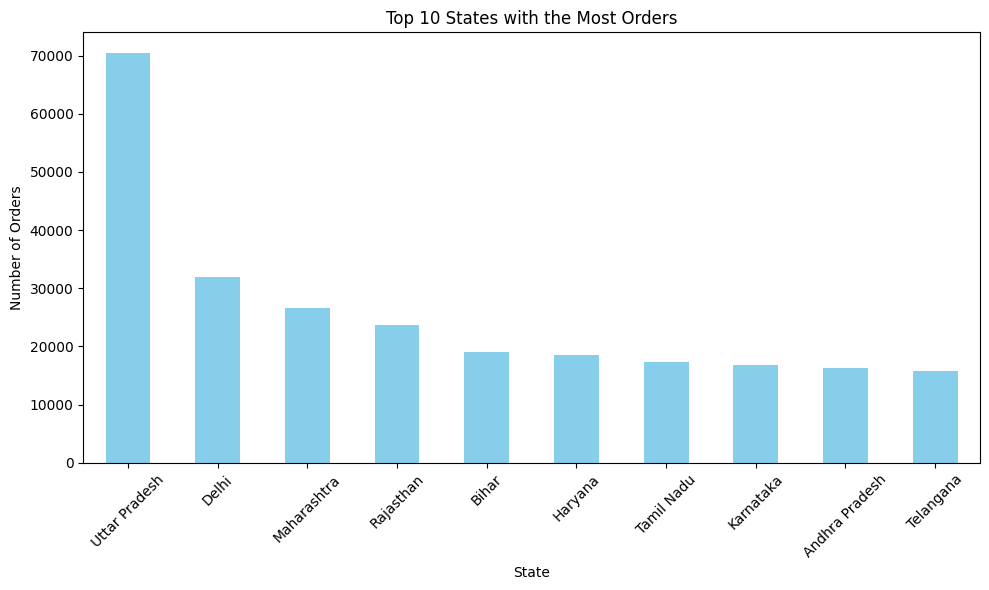

In [15]:
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States with the Most Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
unique_products = sorted(df['product_name'].unique())

In [17]:
for index, product in enumerate(unique_products, start=1):
    print(f"{index}. {product}")

1. -
2. 12 Stars Decorative Star Curtain LED Lights for Diwali Christmas Wedding - 2.5 Meter (1 Curtain  138 LED  6+6 Star)   Diwali Light Curtain   Diwali Star Lights  Best Gift for Diwali
3. 12 Stars Decorative Star Curtain LED Lights for Diwali Christmas Wedding - 2.5 Meter (1 Curtain, 138 LED, 6+6 Star) , Diwali Light Curtain , Diwali Star Lights, Best Gift for Diwali
4. 12 inch HD Phone Screen Magnifier, 3D Mobile Phone Screen Amplifier, Anti-Radiation Eye Protection Mobile Movie Video Enlarger with Foldable Stand Hol
5. 12 inch HD Phone Screen Magnifier, 3D Mobile Phone Screen Amplifier, Anti-Radiation Eye Protection Mobile Movie Video Enlarger with Foldable Stand Holder, for All Smart Phones
6. 24K Gold Face Serum improves Dullness Reduces fine lines (15 ml)
7. 3 In 1 Wireless Charger Induction Phone Holder Wireless Charger Fast Charging Station For Iphone 12 11 XS Mini Pro Max
8. 3 In 1 Wireless Charger Phone Holder Wireless Charger Fast Charging Station For Iphone 12 11 XS Min

In [18]:
df['company'] = df['product_name'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)

In [19]:
df['company'] = df['company'].str.lower()

In [20]:
df['company'] = df['company'].replace({
    'boxen': 'boxn',
    'pinkline2': 'pinkline',
    'plink': 'pinkline',
    'plinkline': 'pinkline',
    'zola': 'zhola',
    'pinkine': 'pinkline'
})

In [21]:
 df['company'] = df['company'].str.replace('®', '', regex=False)

In [22]:
unique_companies = sorted(df['company'].unique())

In [23]:
for index, product in enumerate(unique_companies, start=1):
    print(f"{index}. {product}")

1. -
2. 12
3. 24k
4. 3
5. 360
6. 4
7. aceyank
8. air
9. artificial
10. automoon
11. b
12. bamboo
13. belanto
14. bhavbhav
15. bottle
16. boxn
17. combo
18. crazy
19. cute
20. double
21. electric
22. esquire
23. exegi
24. fruit
25. furshine
26. gadget
27. gala
28. gamaxy
29. generic
30. green
31. hashim's
32. hemovia
33. kartz
34. kgn
35. kingone
36. lip
37. matt
38. milky
39. moist
40. morning
41. mosquito
42. multi
43. natural
44. neck
45. nikush
46. olv
47. orber
48. pad
49. palshiv
50. pink
51. pinkline
52. pr1mer
53. remaxe
54. robotek
55. ronzille
56. rose
57. salicylic
58. silicone
59. stainless
60. sunisa
61. tecnofex
62. the
63. white
64. whitecherry
65. zeerona
66. zhola
67. zodak


In [24]:
company_counts = df['company'].value_counts()
top_10_companies = company_counts.head(10)
total_orders = len(df)

In [25]:
print("Sr. No | Company | Number of Orders | Percentage of Total Orders")
print("-------|---------|-------------------|--------------------------")
for i, (company, count) in enumerate(top_10_companies.items(), 1):
    percentage = (count / total_orders) * 100
    print(f"{i}. | {company} | {count} | {percentage:.2f}%")

Sr. No | Company | Number of Orders | Percentage of Total Orders
-------|---------|-------------------|--------------------------
1. | furshine | 111448 | 31.20%
2. | boxn | 85563 | 23.96%
3. | zhola | 34548 | 9.67%
4. | pink | 34042 | 9.53%
5. | b | 15381 | 4.31%
6. | white | 15131 | 4.24%
7. | whitecherry | 11376 | 3.19%
8. | zodak | 9054 | 2.53%
9. | - | 8803 | 2.46%
10. | olv | 6501 | 1.82%


furshine, boxn, zhola, b bestilo, whitecherry, zodak

# Analysing delivery time

In [26]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['diff'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']

<ipython-input-26-1a6bc2da184a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['diff'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [27]:
avg_diff = delivered_orders['diff'].mean()
min_diff = delivered_orders['diff'].min()
max_diff = delivered_orders['diff'].max()

In [28]:
print(f"Average difference: {avg_diff}")
print(f"Minimum difference: {min_diff}")
print(f"Maximum difference: {max_diff}")

Average difference: 5 days 01:30:16.378613456
Minimum difference: 0 days 21:19:00
Maximum difference: 434 days 03:47:00


In [29]:
cancelled_orders = df[df['order_status'] == 'Cancelled']
cancelled_orders['diff'] = cancelled_orders['last_updated_date'] - cancelled_orders['purchase_date']

<ipython-input-29-b06554fb16fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['diff'] = cancelled_orders['last_updated_date'] - cancelled_orders['purchase_date']


In [30]:
avg_diff = cancelled_orders['diff'].mean()
min_diff = cancelled_orders['diff'].min()
max_diff = cancelled_orders['diff'].max()

In [31]:
print(f"Average difference: {avg_diff}")
print(f"Minimum difference: {min_diff}")
print(f"Maximum difference: {max_diff}")

Average difference: 0 days 12:11:08.423127024
Minimum difference: 0 days 00:00:00
Maximum difference: 155 days 10:27:00


The average customer cancels the order within 12 hours of purchase.

In [32]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']

top_10_states = delivered_orders['StateName'].value_counts().head(10).index

for state in top_10_states:
  avg_delivery_time = delivered_orders[delivered_orders['StateName'] == state]['delivery_time'].mean()
  print(f"{state}: {avg_delivery_time}")

<ipython-input-32-29f2c19e3890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


Uttar Pradesh: 4 days 03:25:24.089108910
Maharashtra: 5 days 14:59:32.826466659
Rajasthan: 4 days 14:49:54.291467405
Delhi: 2 days 11:38:42.234206471
Tamil Nadu: 6 days 08:44:36.773274224
Haryana: 3 days 04:26:10.443037974
Karnataka: 6 days 03:16:49.822380106
Andhra Pradesh: 6 days 08:24:41.600429645
Telangana: 5 days 13:43:58.715380082
Bihar: 5 days 20:25:01.406531757


In [33]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']

average_delivery_times = delivered_orders.groupby('StateName')['delivery_time'].mean()
worst_10_states = average_delivery_times.sort_values(ascending=False).head(10)

print(worst_10_states)

StateName
Andaman and Nico.In.     16 days 21:15:57.500000
Manipur                9 days 20:26:44.285714285
Mizoram                8 days 18:50:58.686131386
Tripura                8 days 03:32:55.973154362
Arunachal Pradesh      7 days 15:38:44.579439252
Nagaland               7 days 09:06:26.783369803
Megalaya               7 days 05:10:28.170731707
Goa                    6 days 23:59:53.622047244
Assam                  6 days 23:55:29.354838709
Dadra and Nagar Hav.             6 days 21:14:04
Name: delivery_time, dtype: timedelta64[ns]


<ipython-input-33-a7c6bb20f3c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [34]:
states = ['Andaman and Nicobar Islands', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh', 'Nagaland', 'Meghalaya']
total_orders = len(df)

for state in states:
  state_orders = len(df[df['StateName'] == state])
  percentage = (state_orders / total_orders) * 100
  print(f"{state}: {state_orders} orders, {percentage:.2f}%")

Andaman and Nicobar Islands: 0 orders, 0.00%
Manipur: 1542 orders, 0.43%
Mizoram: 772 orders, 0.22%
Tripura: 580 orders, 0.16%
Arunachal Pradesh: 854 orders, 0.24%
Nagaland: 1008 orders, 0.28%
Meghalaya: 0 orders, 0.00%


In [35]:
order_status_counts = df['order_status'].value_counts()

for status, count in order_status_counts.items():
  print(f"{status}: {count}")

Shipped: 164485
Shipped - Delivered to Buyer: 117270
Cancelled: 59878
Shipped - Returned to Seller: 13155
Shipped - Picked Up: 1190
Shipped - Returning to Seller: 405
Shipped - Out for Delivery: 328
Pending: 176
Shipping: 154
Shipped - Rejected by Buyer: 88
Shipped - Undeliverable: 18
Shipped - Lost in Transit: 12
Pending - Waiting for Pick Up: 7


In [36]:
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
top_10_cancelled_companies = cancelled_orders['company'].value_counts().head(10)

for company, count in top_10_cancelled_companies.items():
  print(f"{company}: {count} cancelled orders")

boxn: 17164 cancelled orders
furshine: 16170 cancelled orders
pink: 6107 cancelled orders
zhola: 5037 cancelled orders
white: 2038 cancelled orders
zodak: 2015 cancelled orders
whitecherry: 1932 cancelled orders
b: 1790 cancelled orders
-: 1353 cancelled orders
olv: 859 cancelled orders


boxn, furshine, zhola

# Analysing fulfilment channel

In [37]:
fulfillment_channel_counts = df['fulfillment_channel'].value_counts()

for channel, count in fulfillment_channel_counts.items():
  print(f"{channel}: {count}")

Amazon: 191395
Merchant: 165771


In [38]:
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
fulfillment_channel_counts = cancelled_orders['fulfillment_channel'].value_counts()

for channel, count in fulfillment_channel_counts.items():
  print(f"{channel}: {count} cancelled orders")

Amazon: 31053 cancelled orders
Merchant: 28825 cancelled orders


Just like flipkart. not a significant difference in the trend of cancelled orders among fulmilment channels.

# Analysing Yearly Trends

<ipython-input-39-8a39ff92b8df>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df_filtered.groupby(pd.Grouper(key='purchase_date', freq='M'))['amazon_order_id'].count()


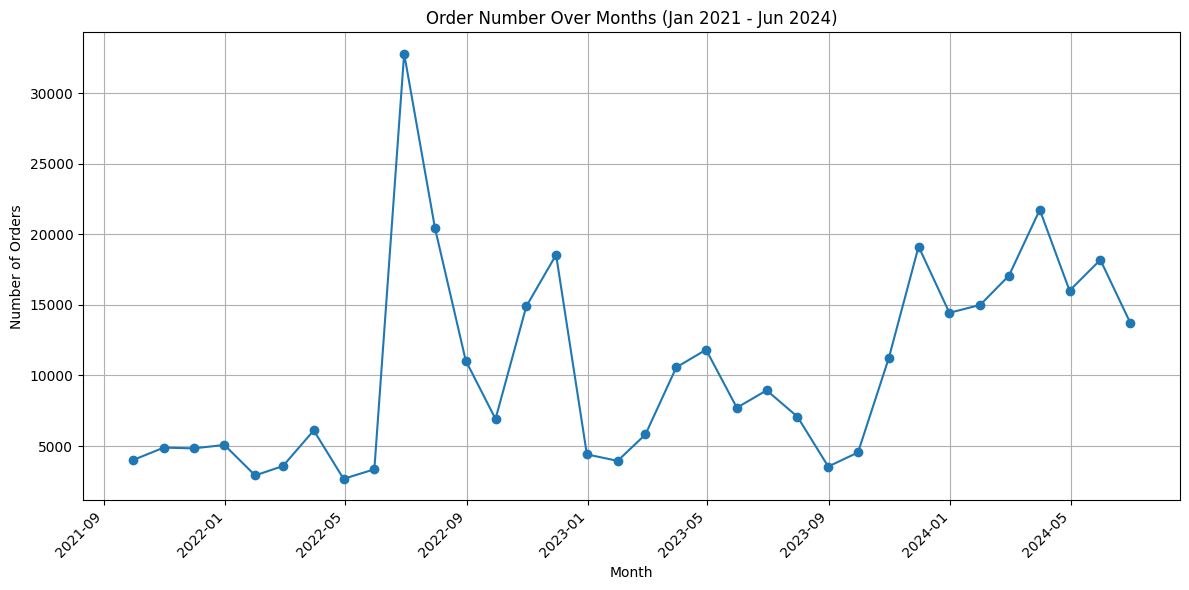

In [39]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2024-06-30')
df_filtered = df[(df['purchase_date'] >= start_date) & (df['purchase_date'] <= end_date)]
monthly_orders = df_filtered.groupby(pd.Grouper(key='purchase_date', freq='M'))['amazon_order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-')
plt.title('Order Number Over Months (Jan 2021 - Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-40-54ff01f3532f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_volume = df_filtered.groupby(pd.Grouper(key='purchase_date', freq='M'))['item_price'].sum()


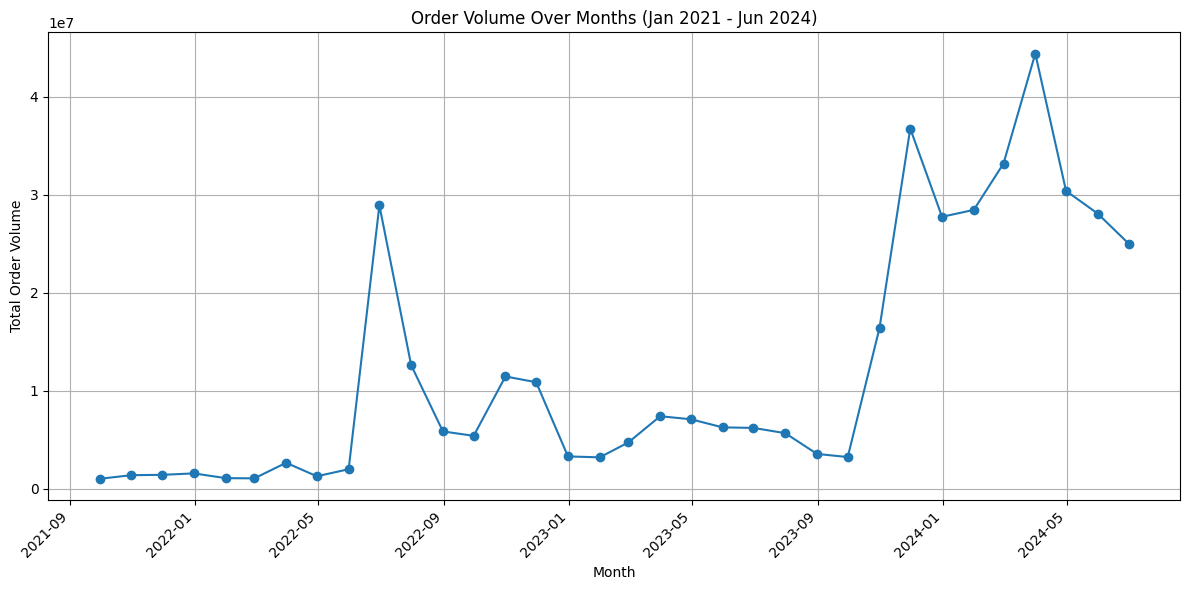

In [40]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2024-06-30')
df_filtered = df[(df['purchase_date'] >= start_date) & (df['purchase_date'] <= end_date)]
monthly_order_volume = df_filtered.groupby(pd.Grouper(key='purchase_date', freq='M'))['item_price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_order_volume.index, monthly_order_volume.values, marker='o', linestyle='-')
plt.title('Order Volume Over Months (Jan 2021 - Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Total Order Volume')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
may_2024_orders = df[(df['purchase_date'].dt.year == 2024) & (df['purchase_date'].dt.month == 5)]
total_order_value_may_2024 = may_2024_orders['item_price'].sum()
print(f"Total order value in May 2024: {total_order_value_may_2024}")

Total order value in May 2024: 28063991.959999997


In [42]:
df['purchase_year'] = df['purchase_date'].dt.year
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
yearly_cancelled_counts = cancelled_orders.groupby('purchase_year')['order_status'].count()

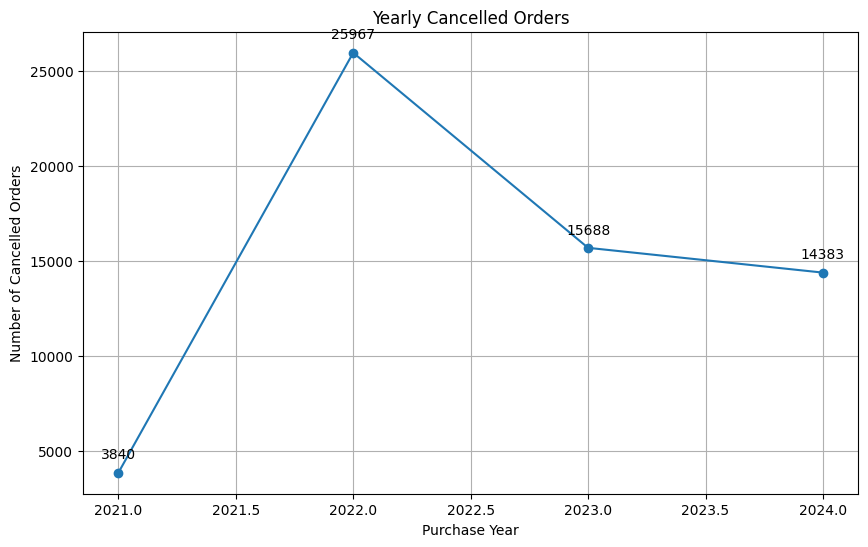

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_cancelled_counts.index, yearly_cancelled_counts.values, marker='o')
for x, y in zip(yearly_cancelled_counts.index, yearly_cancelled_counts.values):
  plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title('Yearly Cancelled Orders')
plt.xlabel('Purchase Year')
plt.ylabel('Number of Cancelled Orders')
plt.grid(True)
plt.show()

In [44]:
canceled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
yearly_cancellation_data = df.groupby('purchase_year').agg(
    total_orders=('amazon_order_id', 'count'),
    canceled_orders=('order_status', lambda x: x.str.contains('Cancelled', na=False).sum())
).reset_index()
yearly_cancellation_data['cancellation_rate'] = (yearly_cancellation_data['canceled_orders'] / yearly_cancellation_data['total_orders']) * 100
print(yearly_cancellation_data[['purchase_year', 'total_orders', 'canceled_orders', 'cancellation_rate']])

   purchase_year  total_orders  canceled_orders  cancellation_rate
0           2021         18802             3840          20.423359
1           2022        127749            25967          20.326578
2           2023        108822            15688          14.416203
3           2024        101793            14383          14.129655


unlike meesho? flipkart? Amazon seems to be improving its cancellation rates

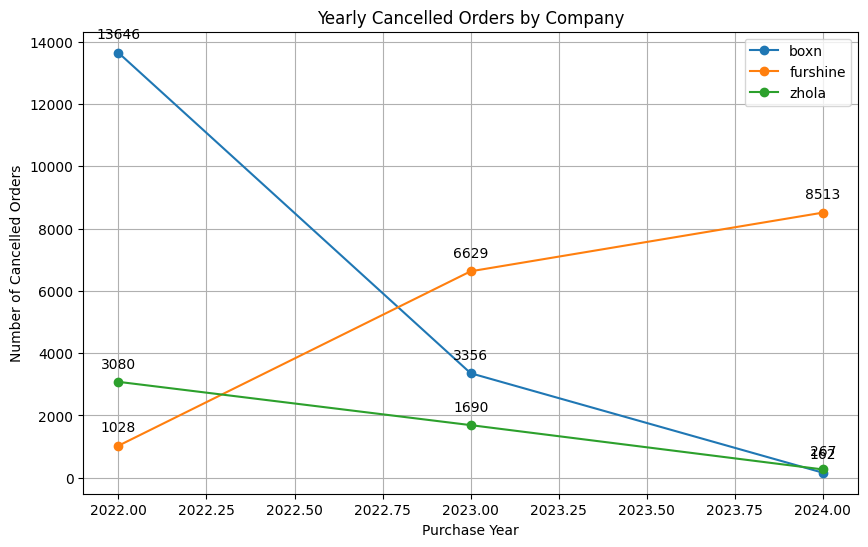

In [45]:
companies = ['boxn', 'furshine', 'zhola']
df['purchase_year'] = df['purchase_date'].dt.year
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]

plt.figure(figsize=(10, 6))

for company in companies:
  company_cancelled = cancelled_orders[cancelled_orders['company'] == company]
  yearly_cancelled = company_cancelled.groupby('purchase_year')['order_status'].count()
  plt.plot(yearly_cancelled.index, yearly_cancelled.values, marker='o', label=company)
  for x, y in zip(yearly_cancelled.index, yearly_cancelled.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Yearly Cancelled Orders by Company')
plt.xlabel('Purchase Year')
plt.ylabel('Number of Cancelled Orders')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df['order_date'] = pd.to_datetime(df['purchase_date'])
returned_orders = df[df['order_status'].str.contains('Returned to Seller', na=False)]
returns_over_time = returned_orders.groupby(df['purchase_date'].dt.to_period('M'))['amazon_order_id'].count()

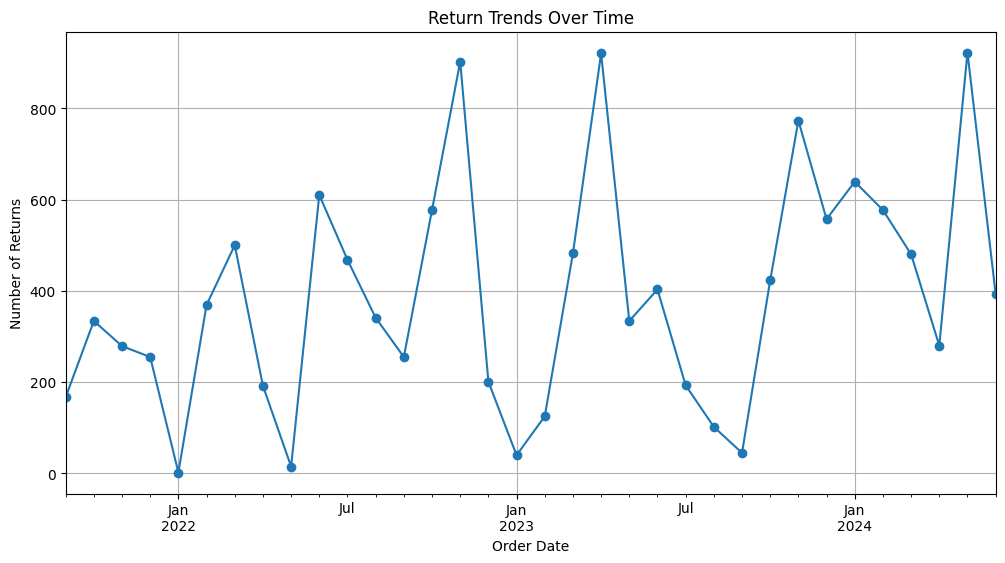

In [47]:
plt.figure(figsize=(12, 6))
returns_over_time.plot(kind='line', marker='o')
plt.title('Return Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Returns')
plt.grid(True)
plt.show()

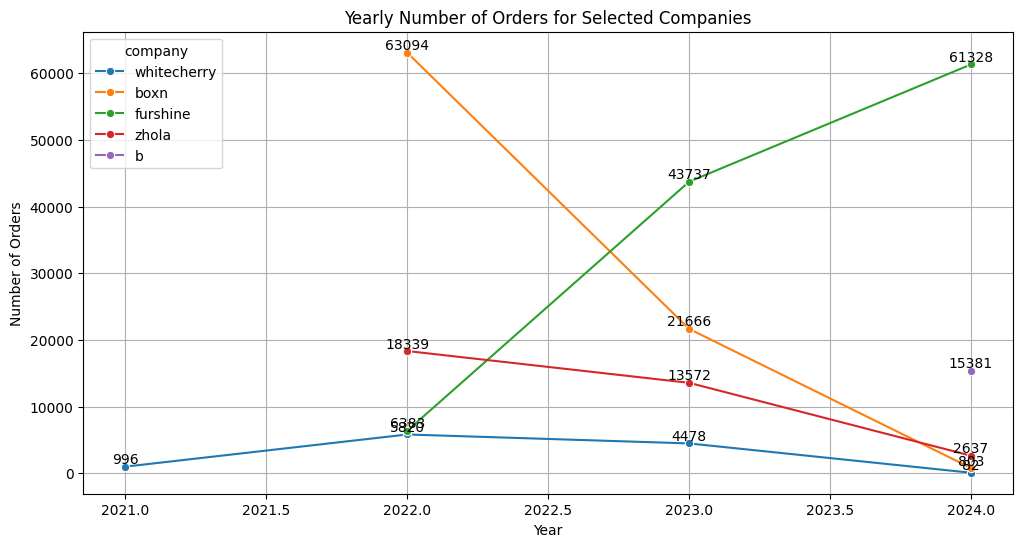

In [48]:
companies = ['boxn', 'furshine', 'whitecherry', 'zhola', 'b']
filtered_df = df[df['company'].isin(companies)]

yearly_orders = filtered_df.groupby(['purchase_year', 'company'])['amazon_order_id'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_orders, x='purchase_year', y='amazon_order_id', hue='company', marker='o')
for x, y, company in zip(yearly_orders['purchase_year'], yearly_orders['amazon_order_id'], yearly_orders['company']):
  plt.text(x, y, str(y), ha='center', va='bottom')

plt.title('Yearly Number of Orders for Selected Companies')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [89]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
sales_2023 = df[df['purchase_date'].dt.year == 2023]
monthly_sales_2023 = sales_2023.groupby(sales_2023['purchase_date'].dt.month)['item_price'].sum()

for month, sales in monthly_sales_2023.items():
    print(f"Month {month}: Total Sales Value = {sales:.2f}")

Month 1: Total Sales Value = 3223661.21
Month 2: Total Sales Value = 4750257.18
Month 3: Total Sales Value = 7417022.69
Month 4: Total Sales Value = 7105856.45
Month 5: Total Sales Value = 6278596.28
Month 6: Total Sales Value = 6226149.18
Month 7: Total Sales Value = 5688998.35
Month 8: Total Sales Value = 3573968.34
Month 9: Total Sales Value = 3254606.93
Month 10: Total Sales Value = 16414035.47
Month 11: Total Sales Value = 36737190.62
Month 12: Total Sales Value = 27745189.47


# Regional analysis

<ipython-input-49-79cab622f65d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='StateName', y='amazon_order_id', data=state_order_volume, palette='viridis')


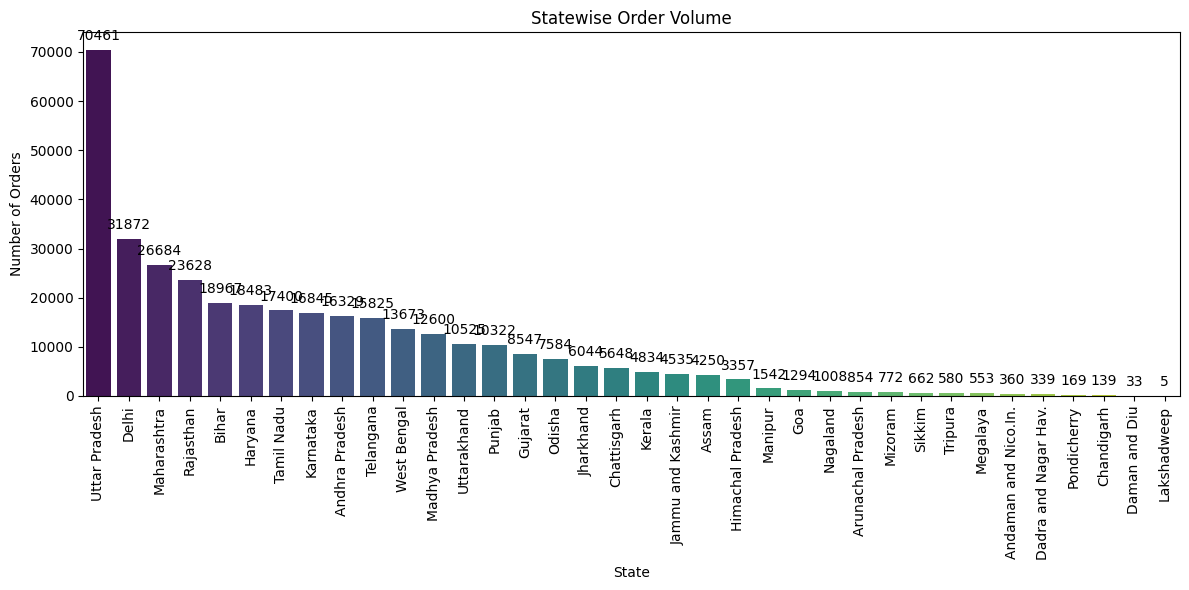

Statewise Order Volume Data Points:
               StateName  amazon_order_id
33         Uttar Pradesh            70461
9                  Delhi            31872
20           Maharashtra            26684
28             Rajasthan            23628
4                  Bihar            18967
12               Haryana            18483
30            Tamil Nadu            17400
16             Karnataka            16845
1         Andhra Pradesh            16329
31             Telangana            15825
35           West Bengal            13673
19        Madhya Pradesh            12600
34           Uttarakhand            10525
27                Punjab            10322
11               Gujarat             8547
25                Odisha             7584
15             Jharkhand             6044
6            Chattisgarh             5648
17                Kerala             4834
14     Jammu and Kashmir             4535
3                  Assam             4250
13      Himachal Pradesh             335

In [49]:
state_order_volume = df.groupby('StateName')['amazon_order_id'].count().reset_index()

state_order_volume = state_order_volume.sort_values(by=['amazon_order_id'], ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='StateName', y='amazon_order_id', data=state_order_volume, palette='viridis')
plt.title('Statewise Order Volume')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()
print("Statewise Order Volume Data Points:")
print(state_order_volume)

In [50]:
states = ['Uttar Pradesh', 'delhi', 'maharashtra', 'rajasthan', 'bihar', 'haryana',
          'tamil nadu', 'karnataka', 'andhra pradesh', 'telangana']
filtered_df = df[df['StateName'].str.lower().isin([state.lower() for state in states])]
state_order_value = filtered_df.groupby('StateName')['item_price'].sum().reset_index(name='order_value')
print("Order Value for Specified States:")
print(state_order_value)

Order Value for Specified States:
        StateName  order_value
0  Andhra Pradesh  25232411.96
1           Bihar  25561512.68
2           Delhi  19167732.40
3         Haryana  18695639.40
4       Karnataka  21407574.72
5     Maharashtra  30023948.67
6       Rajasthan  24861531.76
7      Tamil Nadu  26277879.74
8       Telangana  23235743.30
9   Uttar Pradesh  84268314.13


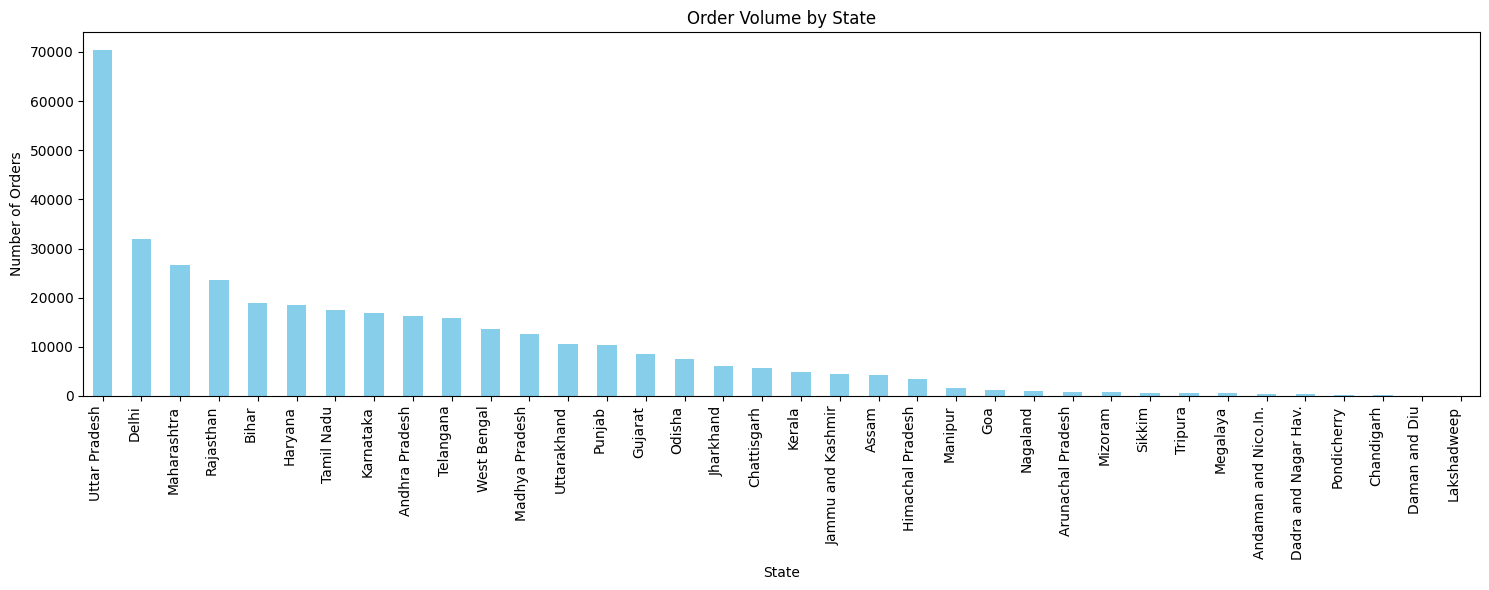

In [51]:
state_order_volume = df['StateName'].value_counts()
plt.figure(figsize=(15, 6))
state_order_volume.plot(kind='bar', color='skyblue')
plt.title('Order Volume by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

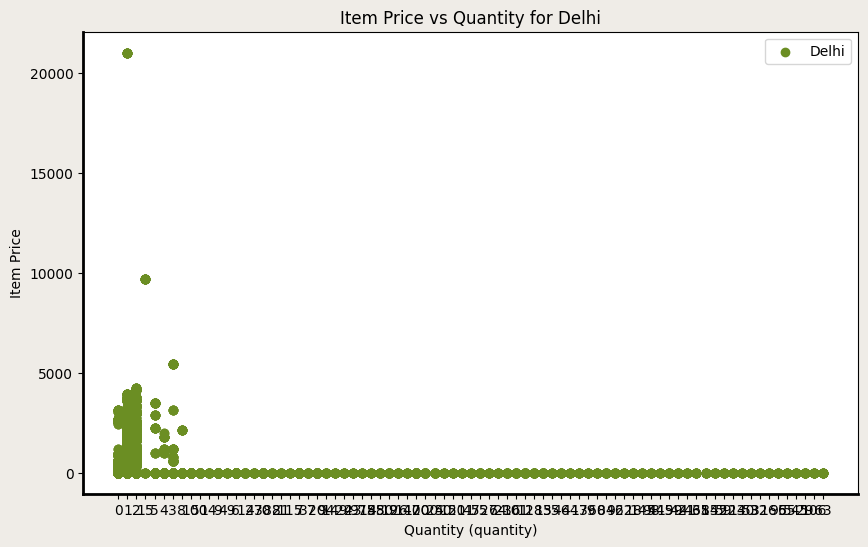

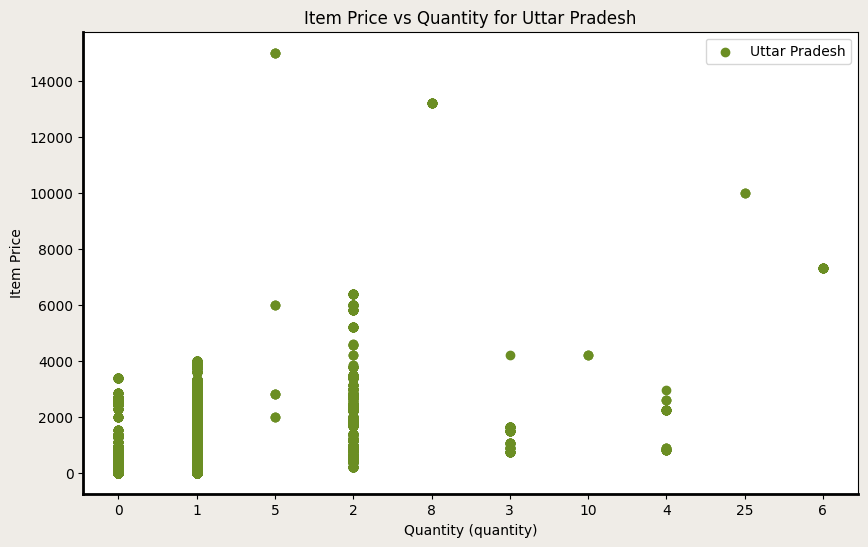

In [52]:
delhi_data = df[(df['StateName'].str.lower() == 'delhi')]
up_data = df[(df['StateName'].str.lower() == 'uttar pradesh')]
fig_delhi, ax_delhi = plt.subplots(figsize=(10, 6))
fig_up, ax_up = plt.subplots(figsize=(10, 6))
ax_delhi.scatter(delhi_data['quantity'], delhi_data['item_price'], color='#6B8E23', label='Delhi')
ax_delhi.set_title('Item Price vs Quantity for Delhi')
ax_delhi.set_xlabel('Quantity (quantity)')
ax_delhi.set_ylabel('Item Price')
ax_delhi.legend()
ax_up.scatter(up_data['quantity'], up_data['item_price'], color='#6B8E23', label='Uttar Pradesh')
ax_up.set_title('Item Price vs Quantity for Uttar Pradesh')
ax_up.set_xlabel('Quantity (quantity)')
ax_up.set_ylabel('Item Price')
ax_up.legend()
fig_delhi.patch.set_facecolor('#EFECE7')
fig_up.patch.set_facecolor('#EFECE7')
for ax in [ax_delhi, ax_up]:
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_color('black')
plt.show()

In [53]:
top10_states = df['StateName'].value_counts().head(10).index
cancelled_orders = df[df['order_status'].str.contains('Cancelled')]

In [54]:
import pandas as pd
canceled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
state_cancellation_data = df.groupby('StateName').agg(
    total_orders=('amazon_order_id', 'count'),
    canceled_orders=('order_status', lambda x: x.str.contains('Cancelled', na=False).sum())
).reset_index()
state_cancellation_data['cancellation_rate'] = (state_cancellation_data['canceled_orders'] / state_cancellation_data['total_orders']) * 100
state_cancellation_data = state_cancellation_data.sort_values(by=['cancellation_rate'], ascending=False)
print(state_cancellation_data[['StateName', 'total_orders', 'canceled_orders', 'cancellation_rate']])

               StateName  total_orders  canceled_orders  cancellation_rate
14     Jammu and Kashmir          4535             1305          28.776185
23               Mizoram           772              210          27.202073
32               Tripura           580              137          23.620690
21               Manipur          1542              357          23.151751
4                  Bihar         18967             4220          22.249170
28             Rajasthan         23628             4999          21.157102
18           Lakshadweep             5                1          20.000000
15             Jharkhand          6044             1118          18.497684
35           West Bengal         13673             2461          17.998976
19        Madhya Pradesh         12600             2232          17.714286
10                   Goa          1294              228          17.619784
27                Punjab         10322             1818          17.612866
33         Uttar Pradesh 

In [55]:
states = ['Jammu & Kashmir', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Madhya Pradesh', 'Rajasthan', 'Bihar']
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']
filtered_orders = delivered_orders[delivered_orders['StateName'].isin(states)]
average_delivery_times = filtered_orders.groupby('StateName')['delivery_time'].mean()
for state, avg_time in average_delivery_times.items():
    print(f"{state}: Average Delivery Time = {avg_time}")

Arunachal Pradesh: Average Delivery Time = 7 days 15:38:44.579439252
Assam: Average Delivery Time = 6 days 23:55:29.354838709
Bihar: Average Delivery Time = 5 days 20:25:01.406531757
Madhya Pradesh: Average Delivery Time = 5 days 05:46:16.941323345
Manipur: Average Delivery Time = 9 days 20:26:44.285714285
Mizoram: Average Delivery Time = 8 days 18:50:58.686131386
Nagaland: Average Delivery Time = 7 days 09:06:26.783369803
Rajasthan: Average Delivery Time = 4 days 14:49:54.291467405
Tripura: Average Delivery Time = 8 days 03:32:55.973154362


<ipython-input-55-427e9909acf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [56]:
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
cancelled_orders['cancellation_time'] = cancelled_orders['last_updated_date'] - cancelled_orders['purchase_date']
filtered_orders = cancelled_orders[cancelled_orders['StateName'].isin(states)]
average_cancellation_times = filtered_orders.groupby('StateName')['cancellation_time'].mean()
print("Average Cancellation Time for Jammu & Kashmir and the 7 Sisters:")
for state, avg_time in average_cancellation_times.items():
    print(f"{state}: {avg_time}")

Average Cancellation Time for Jammu & Kashmir and the 7 Sisters:
Arunachal Pradesh: 0 days 13:20:21.818181818
Assam: 0 days 15:43:27.889908256
Bihar: 0 days 22:48:25.919431279
Madhya Pradesh: 0 days 06:56:31.639784946
Manipur: 0 days 21:42:52.605042016
Mizoram: 0 days 09:32:25.714285714
Nagaland: 0 days 04:27:49.054054054
Rajasthan: 0 days 08:29:56.075215043
Tripura: 0 days 07:10:59.124087591


<ipython-input-56-9510071f04a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['cancellation_time'] = cancelled_orders['last_updated_date'] - cancelled_orders['purchase_date']


In [57]:
avg_state_ship_tax = df.groupby('StateName')['item_tax'].mean().sort_values(ascending=False)
top_20_states = avg_state_ship_tax.head(20)
print("Top 20 States by Average Ship Tax:")
for state, avg_tax in top_20_states.items():
    print(f"{state}: {avg_tax:.2f}")

Top 20 States by Average Ship Tax:
Lakshadweep: 182.99
Pondicherry: 154.73
Odisha: 94.16
Tamil Nadu: 91.00
Andhra Pradesh: 87.69
Goa: 87.69
Jharkhand: 86.82
Telangana: 86.16
Madhya Pradesh: 84.86
Andaman and Nico.In.: 75.00
Bihar: 74.03
Kerala: 73.50
Jammu and Kashmir: 72.93
Chattisgarh: 72.82
Nagaland: 71.08
Arunachal Pradesh: 70.51
Maharashtra: 68.27
Uttarakhand: 65.26
Karnataka: 65.19
Uttar Pradesh: 64.94


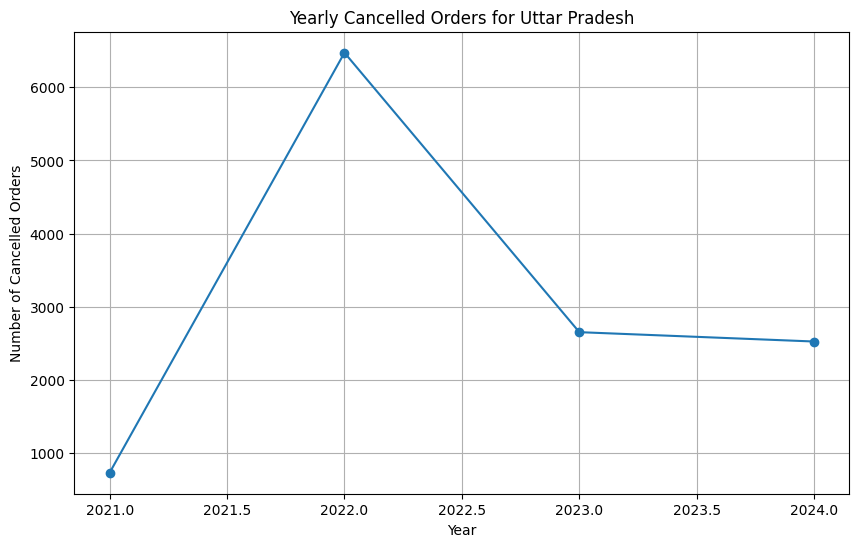

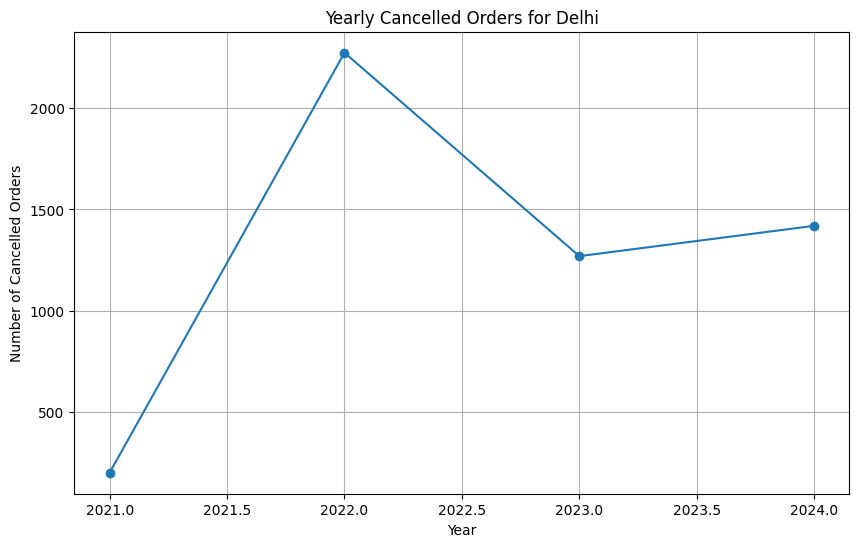

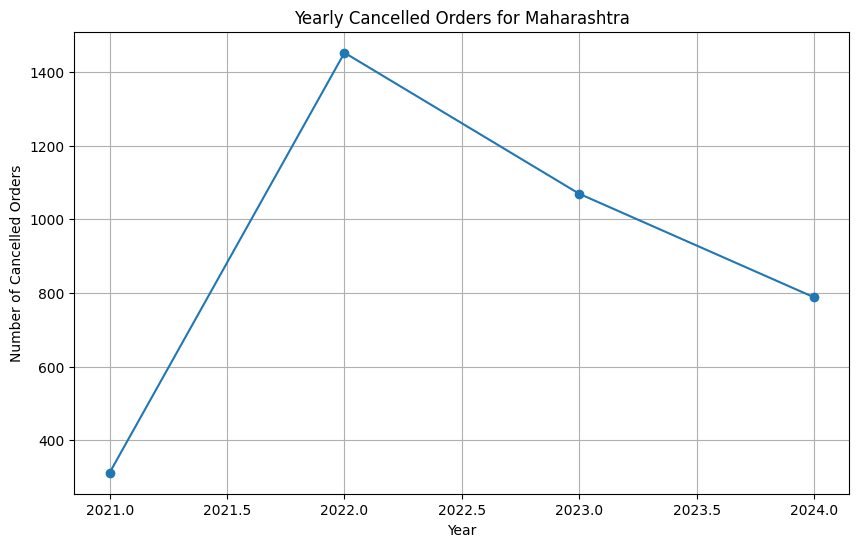

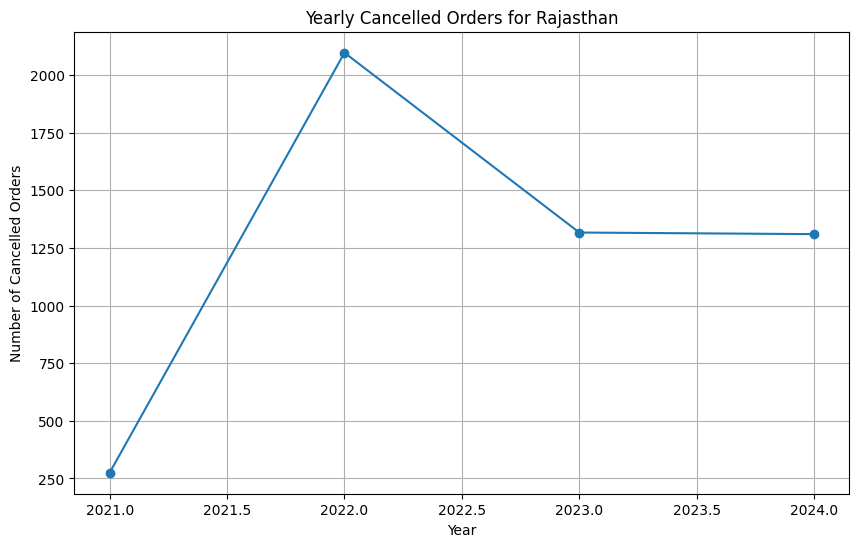

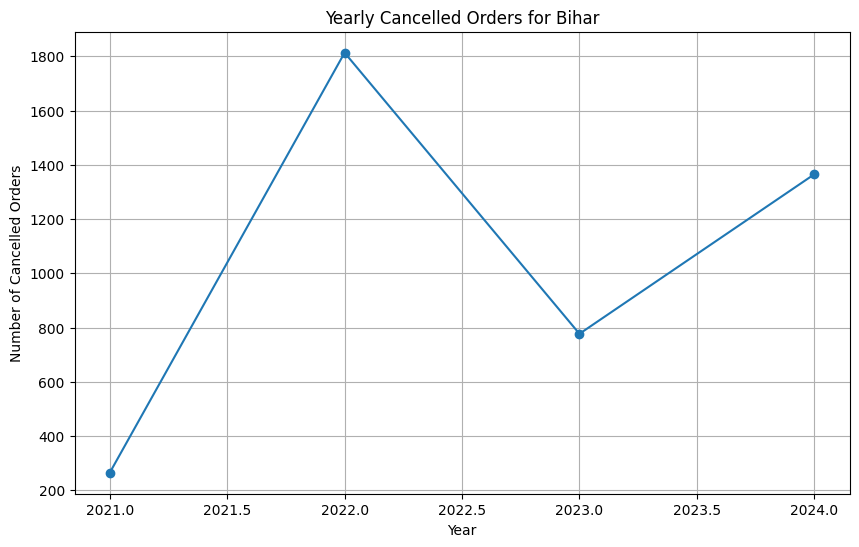

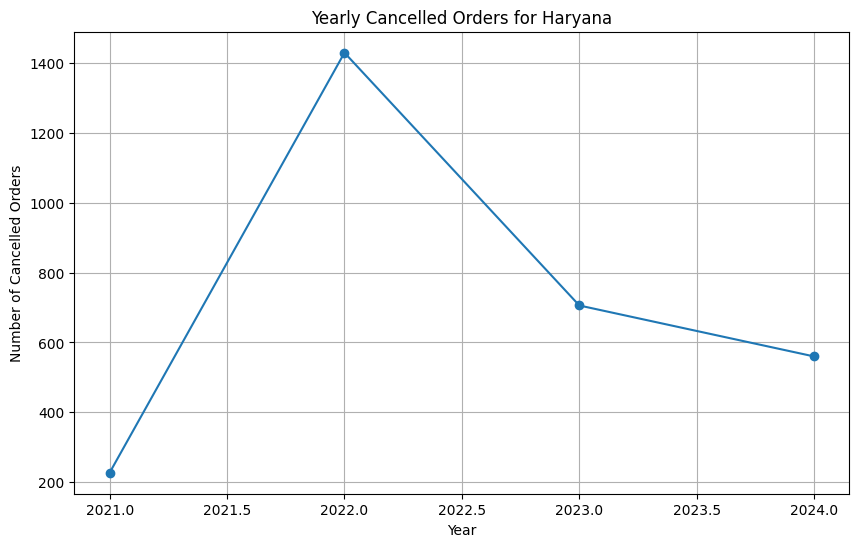

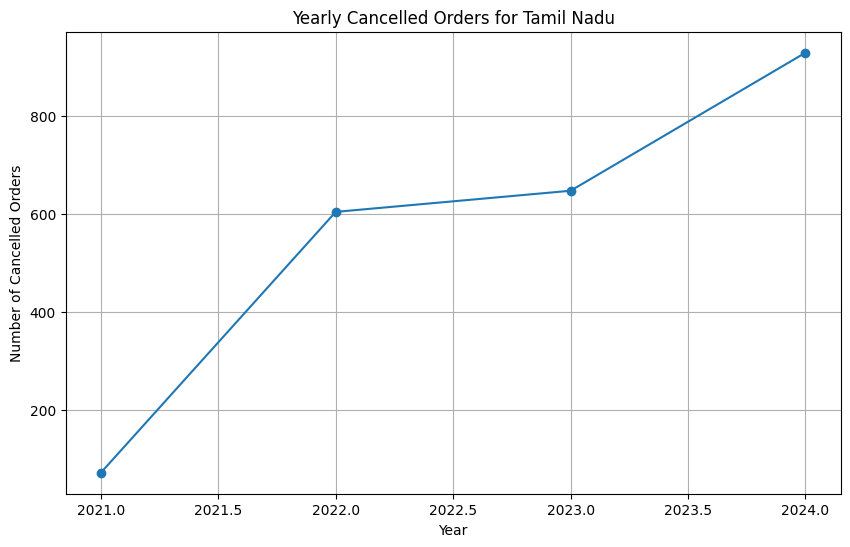

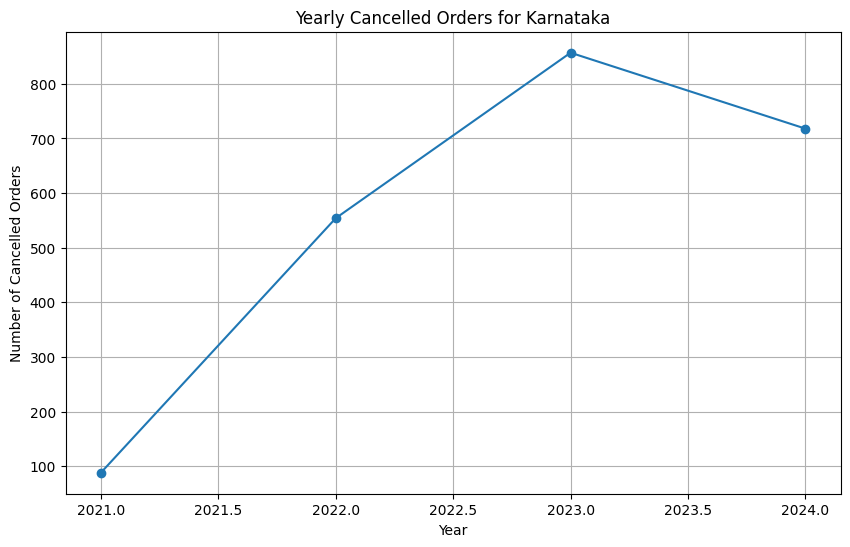

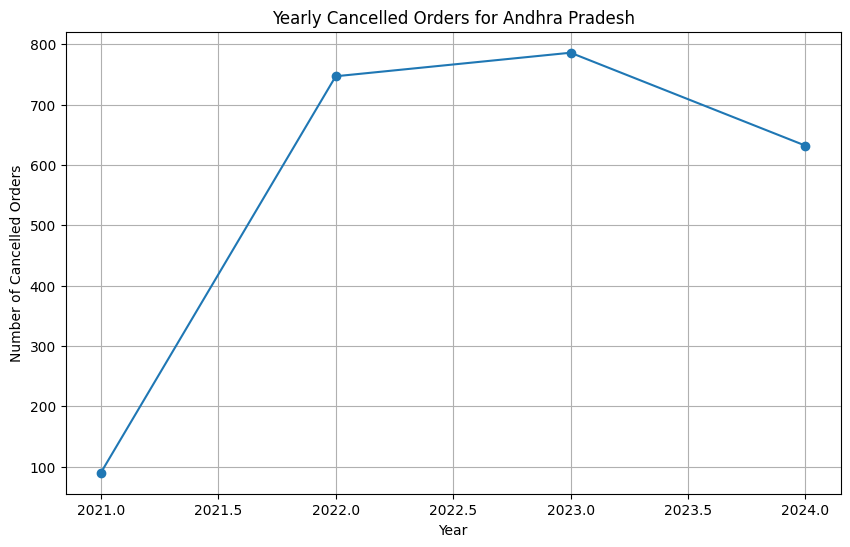

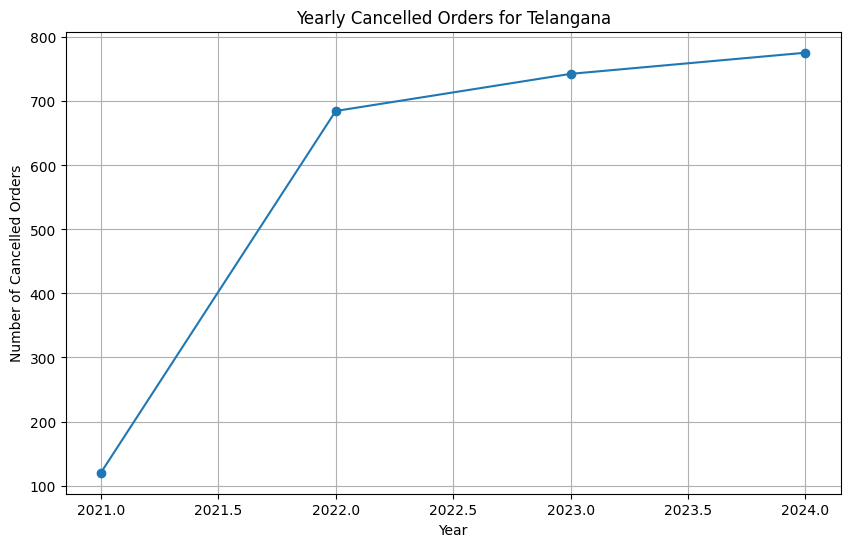

In [58]:
for state in top10_states:
  state_df = cancelled_orders[cancelled_orders['StateName'] == state]
  yearly_cancelled = state_df.groupby(state_df['purchase_date'].dt.year)['order_status'].count()
  plt.figure(figsize=(10, 6))
  plt.plot(yearly_cancelled.index, yearly_cancelled.values, marker='o')
  plt.title(f'Yearly Cancelled Orders for {state}')
  plt.xlabel('Year')
  plt.ylabel('Number of Cancelled Orders')
  plt.grid(True)
  plt.show()

# Analysing account id

In [59]:
df['account_id'] = df['account_id'].astype(int)

In [60]:
for account_id in df['account_id'].unique():
  num_orders = len(df[df['account_id'] == account_id])
  print(f"{account_id}: {num_orders} orders")

3: 118906 orders
4: 171183 orders
5: 58990 orders
16: 7836 orders
18: 251 orders


In [61]:
for account_id in df['account_id'].unique():
  total_orders = len(df[df['account_id'] == account_id])
  returned_orders = len(df[(df['account_id'] == account_id) & (df['order_status'].str.contains('Cancelled'))])
  return_rate = (returned_orders / total_orders) * 100 if total_orders > 0 else 0
  print('Cancellation rate')
  print(f"{account_id}: {return_rate:.2f}%")

Cancellation rate
3: 13.43%
Cancellation rate
4: 19.02%
Cancellation rate
5: 17.45%
Cancellation rate
16: 13.14%
Cancellation rate
18: 11.55%


5

In [62]:
returned_orders = df[df['order_status'] == 'Returned']
order_counts = df.groupby('account_id')['order_status'].count().reset_index(name='total_orders')
returned_counts = returned_orders.groupby('account_id')['order_status'].count().reset_index(name='returned_orders')
return_rates = pd.merge(order_counts, returned_counts, on='account_id', how='left')
return_rates['returned_orders'] = return_rates['returned_orders'].fillna(0)
return_rates['return_rate'] = (return_rates['returned_orders'] / return_rates['total_orders']) * 100
print("Return Rate for Each Account ID:")
print(return_rates[['account_id', 'return_rate']])

Return Rate for Each Account ID:
   account_id  return_rate
0           3          0.0
1           4          0.0
2           5          0.0
3          16          0.0
4          18          0.0


In [63]:
account_id_5 = df[df['account_id'] == 5]
print(account_id_5['StateName'].value_counts().head(10))

StateName
Uttar Pradesh     11643
Delhi              5198
Maharashtra        4514
Rajasthan          4288
Haryana            4052
West Bengal        2963
Karnataka          2612
Madhya Pradesh     2424
Bihar              2248
Tamil Nadu         2153
Name: count, dtype: int64


In [64]:
print(df['StateName'].value_counts().head(10))

StateName
Uttar Pradesh     70461
Delhi             31872
Maharashtra       26684
Rajasthan         23628
Bihar             18967
Haryana           18483
Tamil Nadu        17400
Karnataka         16845
Andhra Pradesh    16329
Telangana         15825
Name: count, dtype: int64


IDs involved with furshine:

In [65]:
for account_id in df['account_id'].unique():
  furshine_orders = len(df[(df['account_id'] == account_id) & (df['company'] == 'furshine')])
  print(f"{account_id}: {furshine_orders} orders")

3: 79681 orders
4: 20241 orders
5: 11526 orders
16: 0 orders
18: 0 orders


IDs involved with zhola:

In [66]:
for account_id in df['account_id'].unique():
  zhola_orders = len(df[(df['account_id'] == account_id) & (df['company'] == 'zhola')])
  print(f"{account_id}: {zhola_orders} orders")

3: 3855 orders
4: 27560 orders
5: 3133 orders
16: 0 orders
18: 0 orders


IDs involved with boxn:

In [67]:
for account_id in df['account_id'].unique():
  boxn_orders = len(df[(df['account_id'] == account_id) & (df['company'] == 'boxn')])
  print(f"{account_id}: {boxn_orders} orders")

3: 223 orders
4: 55013 orders
5: 30327 orders
16: 0 orders
18: 0 orders


In [68]:
for account_id in df['account_id'].unique():
  boxn_orders = len(df[(df['account_id'] == account_id) & (df['company'] == 'b')])
  print(f"{account_id}: {boxn_orders} orders")

3: 14046 orders
4: 0 orders
5: 0 orders
16: 1335 orders
18: 0 orders


In [69]:
for account_id in df['account_id'].unique():
  boxn_orders = len(df[(df['account_id'] == account_id) & (df['company'] == 'whitecherry')])
  print(f"{account_id}: {boxn_orders} orders")

3: 1660 orders
4: 9162 orders
5: 554 orders
16: 0 orders
18: 0 orders


account ids 4 and 5 have high involvement in companies like zhola, whitecherry and boxn and hence they are facing a decline

In [70]:
for account_id in df['account_id'].unique():
  cancelled_furshine = len(df[(df['account_id'] == account_id) & (df['company'] == 'furshine') & (df['order_status'].str.contains('Cancelled'))])
  print(f"{account_id}: {cancelled_furshine} cancelled orders")

3: 10684 cancelled orders
4: 3417 cancelled orders
5: 2069 cancelled orders
16: 0 cancelled orders
18: 0 cancelled orders


67% of total orders of 3 are for furshine

In [71]:
total_furshine_orders = len(df[df['company'] == 'furshine'])
print(f"Total Furshine orders: {total_furshine_orders}")

Total Furshine orders: 111448


In [72]:
print(1068400/111448)
print(341700/111448)

9.586533630033738
3.0660038762472186


In [73]:
order_status_counts = df['order_status'].value_counts()

for status, count in order_status_counts.items():
  print(f"{status}: {count}")

Shipped: 164485
Shipped - Delivered to Buyer: 117270
Cancelled: 59878
Shipped - Returned to Seller: 13155
Shipped - Picked Up: 1190
Shipped - Returning to Seller: 405
Shipped - Out for Delivery: 328
Pending: 176
Shipping: 154
Shipped - Rejected by Buyer: 88
Shipped - Undeliverable: 18
Shipped - Lost in Transit: 12
Pending - Waiting for Pick Up: 7


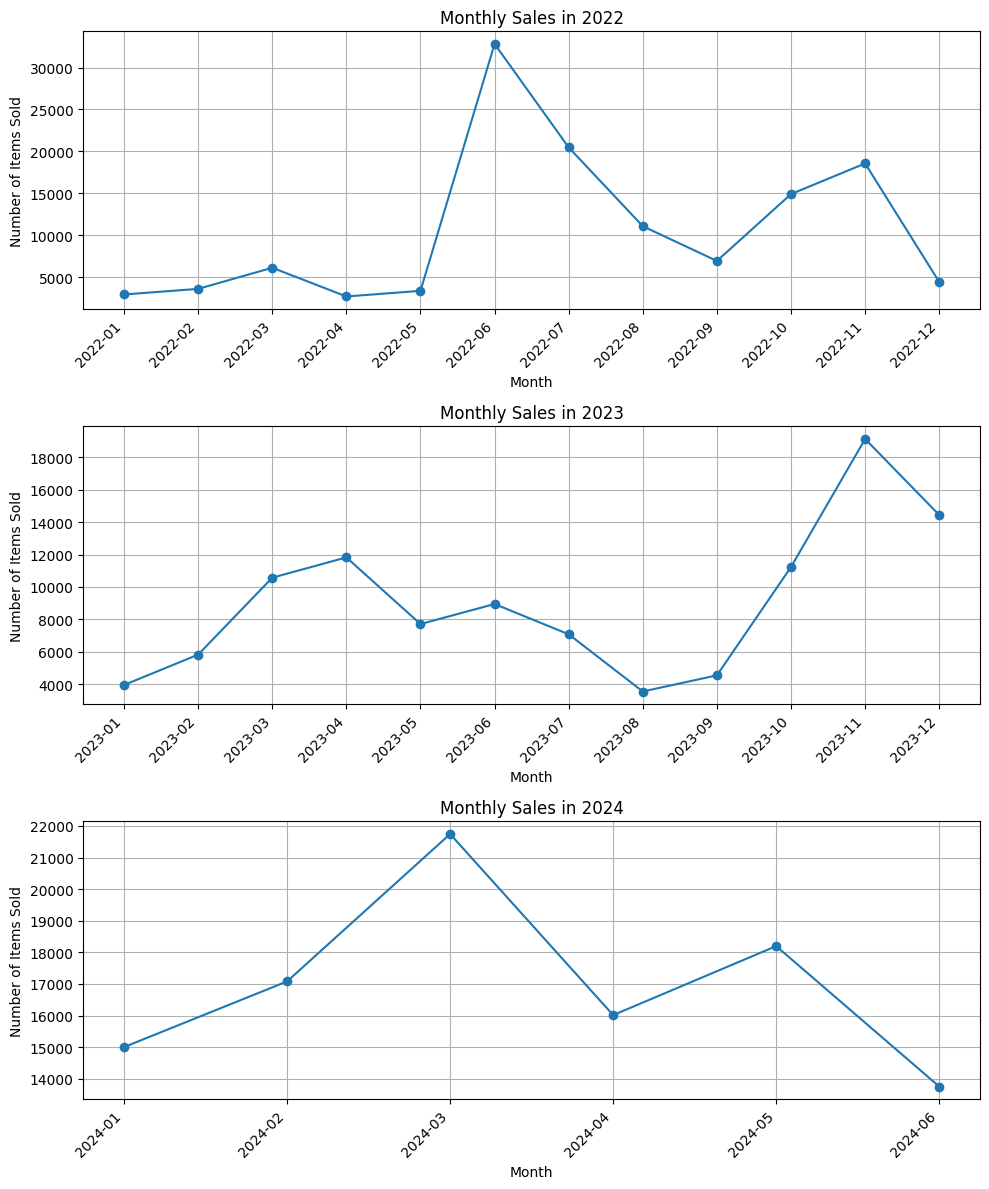

In [74]:
df['purchase_month'] = df['purchase_date'].dt.to_period('M')
df_2022 = df[df['purchase_date'].dt.year == 2022]
df_2023 = df[df['purchase_date'].dt.year == 2023]
df_2024 = df[df['purchase_date'].dt.year == 2024]
monthly_sales_2022 = df_2022.groupby('purchase_month')['amazon_order_id'].count()
monthly_sales_2023 = df_2023.groupby('purchase_month')['amazon_order_id'].count()
monthly_sales_2024 = df_2024.groupby('purchase_month')['amazon_order_id'].count()
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
axes[0].plot(monthly_sales_2022.index.astype(str), monthly_sales_2022.values, marker='o')
axes[0].set_title('Monthly Sales in 2022')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Items Sold')
axes[0].grid(True)
axes[1].plot(monthly_sales_2023.index.astype(str), monthly_sales_2023.values, marker='o')
axes[1].set_title('Monthly Sales in 2023')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Items Sold')
axes[1].grid(True)
axes[2].plot(monthly_sales_2024.index.astype(str), monthly_sales_2024.values, marker='o')
axes[2].set_title('Monthly Sales in 2024')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Items Sold')
axes[2].grid(True)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']
average_delivery_time = delivered_orders['delivery_time'].mean()
print(f"Average Order Delivery Time: {average_delivery_time}")

Average Order Delivery Time: 5 days 01:30:16.378613456


<ipython-input-75-479e48b36abb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [76]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']
average_delivery_times = delivered_orders.groupby('account_id')['delivery_time'].mean()
for account_id, avg_time in average_delivery_times.items():
  print(f"Account ID {account_id}: Average Delivery Time = {avg_time}")

Account ID 3: Average Delivery Time = 5 days 02:23:37.244493328
Account ID 4: Average Delivery Time = 5 days 07:14:57.270070302
Account ID 5: Average Delivery Time = 4 days 19:33:15.230570320
Account ID 16: Average Delivery Time = 5 days 01:22:42.540322580


<ipython-input-76-3349a5bbe955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [77]:
delivered_orders = df[df['order_status'] == 'Shipped - Delivered to Buyer']
delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']
average_delivery_times = delivered_orders.groupby('account_id')['delivery_time'].mean()
print("Average Delivery Time for Each Account ID:")
for account_id, avg_time in average_delivery_times.items():
    print(f"Account ID {account_id}: {avg_time}")

Average Delivery Time for Each Account ID:
Account ID 3: 5 days 02:23:37.244493328
Account ID 4: 5 days 07:14:57.270070302
Account ID 5: 4 days 19:33:15.230570320
Account ID 16: 5 days 01:22:42.540322580


<ipython-input-77-96bc9060e493>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_time'] = delivered_orders['last_updated_date'] - delivered_orders['purchase_date']


In [78]:
average_ship_tax = df.groupby('account_id')['item_tax'].mean()
print("Average Ship Tax for Each Account ID:")
for account_id, avg_tax in average_ship_tax.items():
    print(f"Account ID {account_id}: {avg_tax:.2f}")

Average Ship Tax for Each Account ID:
Account ID 3: 112.30
Account ID 4: 30.17
Account ID 5: 76.10
Account ID 16: 75.57
Account ID 18: 0.00


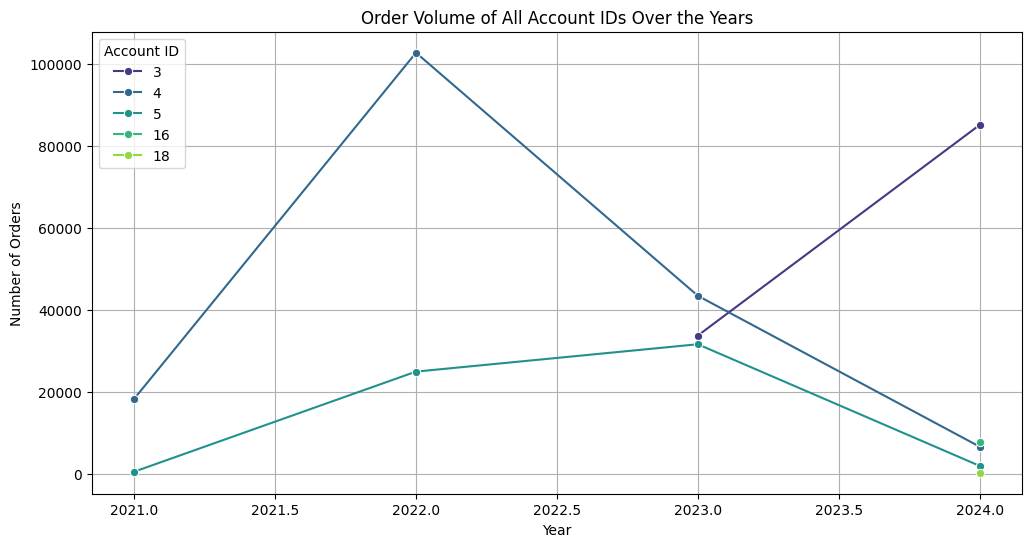

In [79]:
account_yearly_orders = df.groupby(['account_id', 'purchase_year'])['amazon_order_id'].count().reset_index()
unique_account_ids = account_yearly_orders['account_id'].unique()
custom_palette = sns.color_palette("viridis", n_colors=len(unique_account_ids))
custom_palette_dict = dict(zip(unique_account_ids, custom_palette))

plt.figure(figsize=(12, 6))
sns.lineplot(data=account_yearly_orders, x='purchase_year', y='amazon_order_id',
             hue='account_id', marker='o', palette=custom_palette_dict)
plt.title('Order Volume of All Account IDs Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend(title='Account ID')
plt.show()


# Ship Service Levels

In [80]:
ship_service_levels = df['ship_service_level'].unique()

print("Ship Service Levels:")
for level in ship_service_levels:
    print(level)

Ship Service Levels:
Standard
Expedited
NextDay
SecondDay
Priority


In [81]:
service_level_counts = df.groupby('ship_service_level')['ship_service_level'].count().reset_index(name='count')
print("Count of Each Ship Service Level:")
print(service_level_counts)

Count of Each Ship Service Level:
  ship_service_level   count
0          Expedited  177432
1            NextDay    4641
2           Priority     104
3          SecondDay    3213
4           Standard  171776


<ipython-input-82-9130b9d8305e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ship_service_level', y='item_price', data=order_value_by_service, palette='viridis')


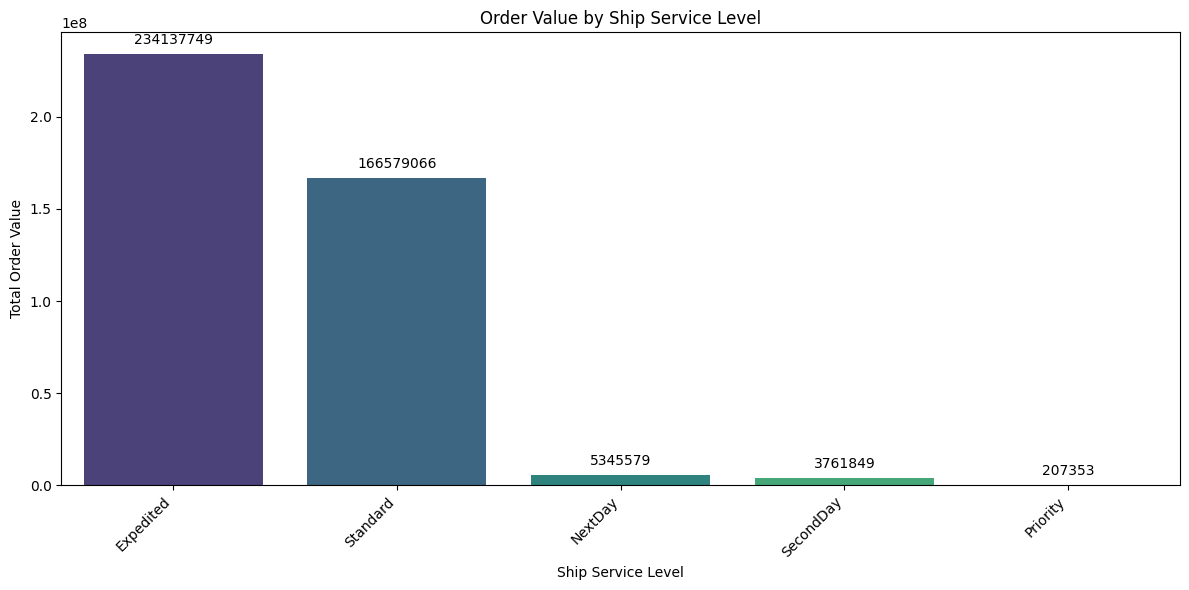

Order Value by Ship Service Level Data Points:
  ship_service_level    item_price
0          Expedited  2.341377e+08
4           Standard  1.665791e+08
1            NextDay  5.345579e+06
3          SecondDay  3.761849e+06
2           Priority  2.073526e+05


In [82]:
order_value_by_service = df.groupby('ship_service_level')['item_price'].sum().reset_index()
order_value_by_service = order_value_by_service.sort_values(by=['item_price'], ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='ship_service_level', y='item_price', data=order_value_by_service, palette='viridis')
plt.title('Order Value by Ship Service Level')
plt.xlabel('Ship Service Level')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()
print("Order Value by Ship Service Level Data Points:")
print(order_value_by_service)

In [83]:
average_price = df.groupby('ship_service_level')['item_price'].mean().reset_index()
print(average_price)

  ship_service_level   item_price
0          Expedited  1319.591441
1            NextDay  1151.816113
2           Priority  1993.775000
3          SecondDay  1170.821276
4           Standard   969.745869


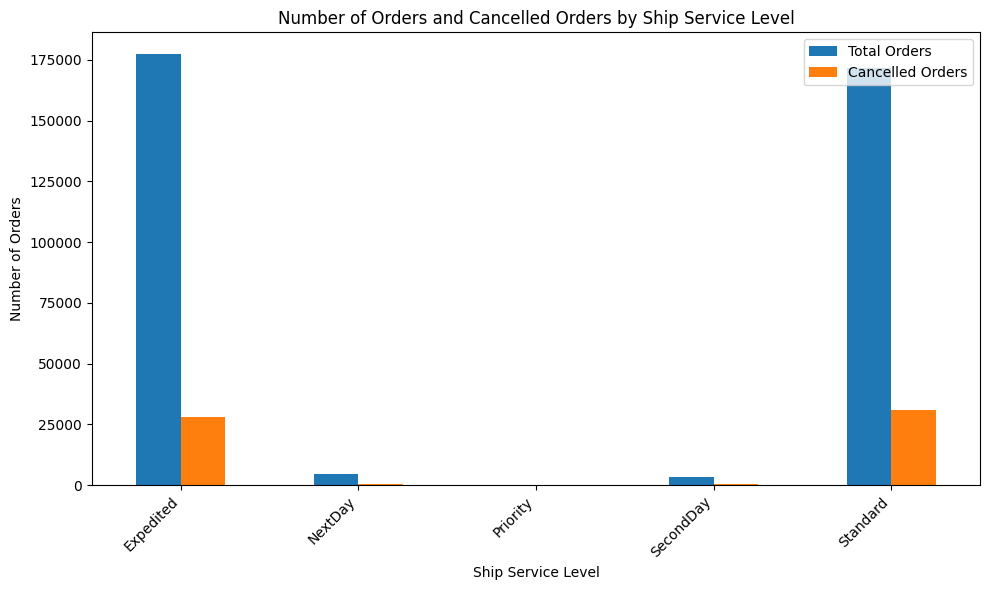


Percentage of Cancelled Orders for Each Ship Service Level:
Expedited: 15.88%
NextDay: 9.48%
Priority: 16.35%
SecondDay: 13.60%
Standard: 17.94%


In [84]:
ship_service_level_counts = df['ship_service_level'].value_counts()
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]
cancelled_counts = cancelled_orders['ship_service_level'].value_counts()
plot_df = pd.DataFrame({'Total Orders': ship_service_level_counts, 'Cancelled Orders': cancelled_counts})
plot_df = plot_df.fillna(0)
plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Orders and Cancelled Orders by Ship Service Level')
plt.xlabel('Ship Service Level')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print("\nPercentage of Cancelled Orders for Each Ship Service Level:")
for level in plot_df.index:
    total_orders = plot_df.loc[level, 'Total Orders']
    cancelled_orders = plot_df.loc[level, 'Cancelled Orders']
    percentage = (cancelled_orders / total_orders) * 100 if total_orders > 0 else 0
    print(f"{level}: {percentage:.2f}%")

In [85]:
cancelled_orders = df[df['order_status'].str.contains('Cancelled', na=False)]

standard_cancelled = cancelled_orders[cancelled_orders['ship_service_level'] == 'Standard'].shape[0]
expedited_cancelled = cancelled_orders[cancelled_orders['ship_service_level'] == 'Expedited'].shape[0]

print(f"Standard Cancelled Orders: {standard_cancelled}")
print(f"Expedited Cancelled Orders: {expedited_cancelled}")

Standard Cancelled Orders: 30815
Expedited Cancelled Orders: 28169


In [86]:
order_status_counts = df.groupby('order_status')['order_status'].count().reset_index(name='count')

# Print the results
print("Order Status Counts:")
print(order_status_counts)

Order Status Counts:
                     order_status   count
0                       Cancelled   59878
1                         Pending     176
2   Pending - Waiting for Pick Up       7
3                         Shipped  164485
4    Shipped - Delivered to Buyer  117270
5       Shipped - Lost in Transit      12
6      Shipped - Out for Delivery     328
7             Shipped - Picked Up    1190
8     Shipped - Rejected by Buyer      88
9    Shipped - Returned to Seller   13155
10  Shipped - Returning to Seller     405
11        Shipped - Undeliverable      18
12                       Shipping     154


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357166 entries, 0 to 357168
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   amazon_order_id          357166 non-null  object        
 1   merchant_order_id        191395 non-null  object        
 2   purchase_date            357166 non-null  datetime64[ns]
 3   last_updated_date        357166 non-null  datetime64[ns]
 4   order_status             357166 non-null  object        
 5   fulfillment_channel      357166 non-null  object        
 6   ship_service_level       357166 non-null  object        
 7   product_name             357166 non-null  object        
 8   sku                      357166 non-null  object        
 9   asin                     357166 non-null  object        
 10  item_status              328341 non-null  object        
 11  quantity                 357166 non-null  object        
 12  item_price           